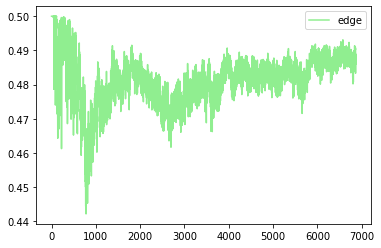

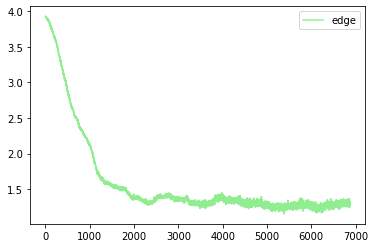

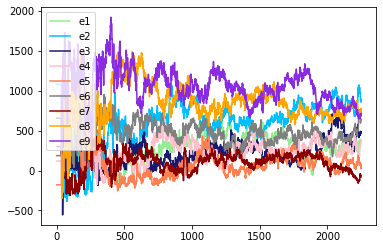

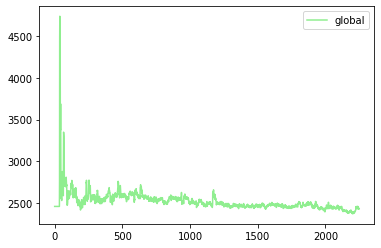

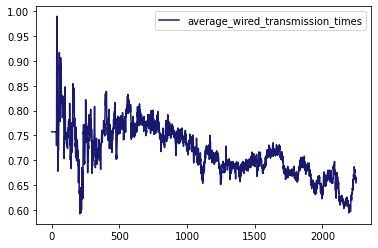

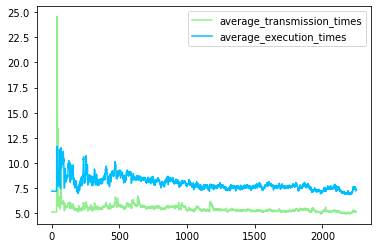

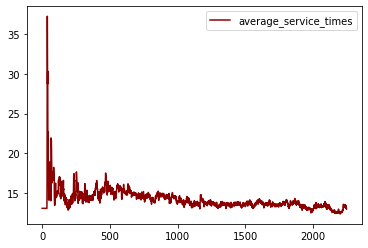

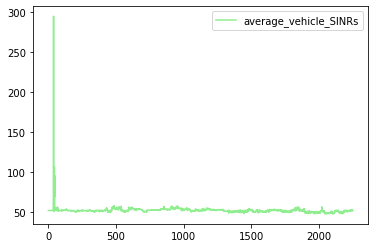

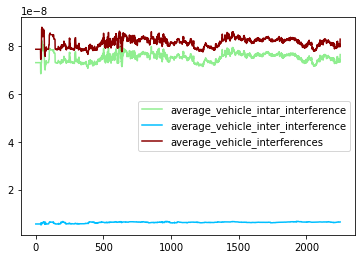

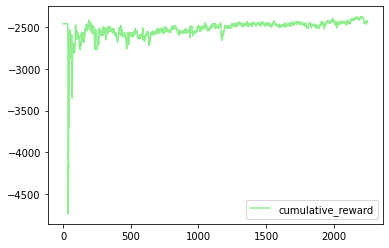

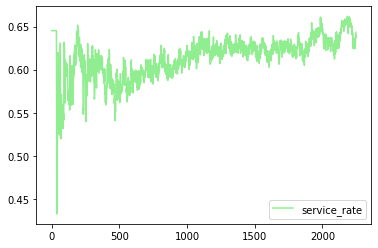

2203
cumulative_reward:  -2367.9081924973502
average_edge_reward:  430.2372128522222
service_rate:  0.6598157335223246
average_interference:  8.025030204409643e-08
average_service_time:  12.420083202096013
average_wired_transmission_time:  0.5986296157662354


In [25]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

pd.set_option('display.max_rows', None)

# # learning_pre_insert = 1
# # file_name = "/home/neardws/acme/8e7efb74-f7c9-11ec-be0b-04d9f5632a58/"

# # learning_pre_insert = 8
# file_name = "/home/neardws/acme/8ba9d4c6-f7cb-11ec-a0ba-04d9f5632a58/"

# # learning_pre_insert = 16
# file_name = "/home/neardws/acme/6b039266-f7d0-11ec-9a73-04d9f5632a58/"

# # learning_pre_insert = 32
# # Network hidden layers = 3  policy [256, 128, 64]  critic [512, 256, 128]
# file_name = "/home/neardws/acme/8931e7de-f7d4-11ec-b83d-04d9f5632a58/"

# # 23:00 - 23:05
# file_name = "/home/neardws/acme/58934b1e-f7f1-11ec-942a-04d9f5632a58/"


# # 5MHz
file_name = "/home/neardws/acme/9ed515b6-f7f7-11ec-a0d2-04d9f5632a58/"

# # 15 MHz
# # file_name = "/home/neardws/acme/35cdfd5c-f7f8-11ec-9040-04d9f5632a58/"

# file_name = "/home/neardws/acme/032a4218-fe5e-11ec-8c15-04d9f5632a58/"

# file_name = "/home/neardws/acme/acdb8892-fe65-11ec-ade6-04d9f5632a58/"

# file_name = "/home/neardws/acme/0b2c86a6-fe90-11ec-a5b9-04d9f5632a58/"

# # 
# # n-step = 5 batch_size = 256 samples_per_insert = 32.0
# file_name = "/home/neardws/acme/307ab6e6-fe98-11ec-8aff-04d9f5632a58/"

# file_name = "/home/neardws/acme/c0cbc01c-ff26-11ec-8165-04d9f5632a58/"

# # change learning
# file_name = "/home/neardws/acme/0f943b5e-ff2f-11ec-9dc6-04d9f5632a58/"

# # change the environment action
# file_name = "/home/neardws/acme/bf8ac846-ff59-11ec-ba51-04d9f5632a58/"

# # change the environment observation and add occuipy
# # file_name = "/home/neardws/acme/dc291d68-ff7c-11ec-89c8-04d9f5632a58/"

# # n-step = 5
# # file_name = "/home/neardws/acme/7696a54a-ff7e-11ec-815b-04d9f5632a58/"

# # file_name = "/home/neardws/acme/8601163e-ff86-11ec-8e7e-04d9f5632a58/"

# file_name = "/home/neardws/acme/ff9bbff6-ffec-11ec-8843-04d9f5632a58/"

# # fix the policy loss 
# file_name = "/home/neardws/acme/5339df6c-fff2-11ec-84b9-04d9f5632a58/"

# # change dpg_a_t to policy_a_t
# file_name = "/home/neardws/acme/2b9feafc-fff5-11ec-abab-04d9f5632a58/"

# task_request_rate = 0.3
# file_name = "/home/neardws/acme/2b34fdec-0030-11ed-9f27-04d9f5632a58/"

# task_request_rate = 0.35
# file_name = "/home/neardws/acme/b1171468-0030-11ed-9d1a-04d9f5632a58/"

# task_request_rate = 0.4
# file_name = "/home/neardws/acme/da0827c2-0030-11ed-b9c3-04d9f5632a58/"

# new flie name
# file_name = "/home/neardws/acme/1008b7ca-0f0d-11ed-86d5-04d9f5632a58/"

# new new file name 
file_name = "/home/neardws/acme/f0abfe52-1207-11ed-84a7-04d9f5632a58/"

file_name = "/home/neardws/acme/2e919be2-1234-11ed-972a-04d9f5632a58/"

# change the action noise
file_name = "/home/neardws/acme/681ed704-1238-11ed-91e8-04d9f5632a58/"

# sample_per_insert = 8
file_name = "/home/neardws/acme/35437816-1239-11ed-9fbb-04d9f5632a58/"

# change_dpg_a_t
file_name = "/home/neardws/acme/f43e82e6-123a-11ed-a08d-04d9f5632a58/"

# task_request_rate = 0.45
# file_name = ""

# task_request_rate = 0.5
# file_name = ""

file_name = "/home/neardws/acme/215689fc-130a-11ed-ab10-04d9f5632a58/"

# change actions
# file_name = "/home/neardws/acme/74bcdc08-1324-11ed-9387-04d9f5632a58/"

# add show loss
file_name = "/home/neardws/acme/b2213ab6-1325-11ed-adb6-04d9f5632a58/"

# change the reward 
file_name = "/home/neardws/acme/89ed9200-140c-11ed-8c72-04d9f5632a58/"

file_name = "/home/neardws/acme/8f7e3c2c-171a-11ed-9880-04d9f5632a58/"

file_name = "/home/neardws/acme/06d772aa-1731-11ed-98f7-04d9f5632a58/"

start_index = 0
loss_file_name = file_name + "logs/learner/logs.csv"
returns_file_name = file_name + "logs/evaluator/logs.csv"
# actor_file_name = file_name + "logs/actor/logs.csv"

name=["critic_loss", "evaluator_episodes", "evaluator_steps", "learner_steps", "learner_walltime", "policy_loss"]
loss_df = pd.read_csv(loss_file_name, names=name, header=0)

edge_policy_loss = loss_df["policy_loss"].values.tolist()
epoch_index = [i for i in range(len(edge_policy_loss))]
epoch_index = epoch_index[start_index:]
plt.plot(epoch_index, edge_policy_loss[start_index: ], '-', color='lightgreen', label='edge')
plt.legend(loc="best")  # 图例
plt.show()

edge_critic_loss = loss_df["critic_loss"].values.tolist()
epoch_index = [i for i in range(len(edge_critic_loss))]
epoch_index = epoch_index[start_index:]

plt.plot(epoch_index, edge_critic_loss[start_index: ], '-', color='lightgreen', label='edge')
plt.legend(loc="best")  # 图例
plt.show()


names=["average_execution_times", "average_service_times", "average_transmision_times", "average_vehicle_SINRs", "average_vehicle_intar_interference", "average_vehicle_inter_interference",  "average_vehicle_interferences", "average_wired_transmission_times", "cumulative_reward", "episode_length", "episode_return", "evaluator_episodes", "evaluator_steps", "service_rate", "steps_per_second"]
# returns_df = pd.read_csv(returns_file_name, names=["actor_episodes", "actor_steps", "episode_length", "episode_return", "evaluator_episodes", "evaluator_steps", "steps_per_second"], header=0)
returns_df = pd.read_csv(returns_file_name, names=names, header=0)
episode_return = returns_df["episode_return"].values
returns = np.zeros(shape=(len(episode_return), 10))

for ret_index in range(episode_return.shape[0]):
    process_str = episode_return[ret_index].replace("[", "").replace("]", "").split(" ")
    while "" in process_str:
        process_str.remove("")
    for index in range(len(process_str)):
        s = process_str[index]
        if process_str[index].endswith("\n"):
            s = s.replace("\n", "")
        f_s = float(s)
        returns[ret_index][index] = f_s


start_index = 0
end_index = -1
epoch_index = [i for i in range(episode_return.shape[0])]

epoch_index = epoch_index[start_index:end_index]

e1_return = returns[:, 0].tolist()
e2_return = returns[:, 1].tolist()
e3_return = returns[:, 2].tolist()
e4_return = returns[:, 3].tolist()
e5_return = returns[:, 4].tolist()
e6_return = returns[:, 5].tolist()
e7_return = returns[:, 6].tolist()
e8_return = returns[:, 7].tolist()
e9_return = returns[:, 8].tolist()
plt.plot(epoch_index, e1_return[start_index:end_index], '-', color='lightgreen', label='e1')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e2_return[start_index:end_index], '-', color='deepskyblue', label='e2')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e3_return[start_index:end_index], '-', color='midnightblue', label='e3')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e4_return[start_index:end_index], '-', color='pink', label='e4')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e5_return[start_index:end_index], '-', color='coral', label='e5')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e6_return[start_index:end_index], '-', color='gray', label='e6')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e7_return[start_index:end_index], '-', color='darkred', label='e7')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e8_return[start_index:end_index], '-', color='orange', label='e8')
# plt.legend(loc="best")  # 图例
# plt.show()
plt.plot(epoch_index, e9_return[start_index:end_index], '-', color='blueviolet', label='e9')
plt.legend(loc="best")  # 图例
plt.show()

edge_return = returns[start_index:end_index, 9].tolist()
plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='global')
plt.legend(loc="best")  # 图例
plt.show()

average_transmission_times = returns_df["average_transmision_times"].values
average_execution_times = returns_df["average_execution_times"].values
average_wired_transmission_times = returns_df["average_wired_transmission_times"].values
average_service_times = returns_df["average_service_times"].values

plt.plot(epoch_index, average_wired_transmission_times[start_index:end_index], '-', color='midnightblue', label='average_wired_transmission_times')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_transmission_times[start_index:end_index], '-', color='lightgreen', label='average_transmission_times')
plt.plot(epoch_index, average_execution_times[start_index:end_index], '-', color='deepskyblue', label='average_execution_times')
plt.legend(loc="best")  # 图例
plt.show()

plt.plot(epoch_index, average_service_times[start_index:end_index], '-', color='darkred', label='average_service_times')
plt.legend(loc="best")  # 图例
plt.show()

average_vehicle_SINRs = returns_df["average_vehicle_SINRs"].values
plt.plot(epoch_index, average_vehicle_SINRs[start_index:end_index], '-', color='lightgreen', label='average_vehicle_SINRs')
plt.legend(loc="best")  # 图例
plt.show()

average_vehicle_intar_interference = returns_df["average_vehicle_intar_interference"].values
average_vehicle_inter_interference = returns_df["average_vehicle_inter_interference"].values
average_vehicle_interferences = returns_df["average_vehicle_interferences"].values
plt.plot(epoch_index, average_vehicle_intar_interference[start_index:end_index], '-', color='lightgreen', label='average_vehicle_intar_interference')
plt.plot(epoch_index, average_vehicle_inter_interference[start_index:end_index], '-', color='deepskyblue', label='average_vehicle_inter_interference')
plt.plot(epoch_index, average_vehicle_interferences[start_index:end_index], '-', color='darkred', label='average_vehicle_interferences')
plt.legend(loc="best")  # 图例
plt.show()

cumulative_reward = returns_df["cumulative_reward"].values
plt.plot(epoch_index, cumulative_reward[start_index:end_index], '-', color='lightgreen', label='cumulative_reward')
plt.legend(loc="best")  # 图例
plt.show()

service_rate = returns_df["service_rate"].values
plt.plot(epoch_index, service_rate[start_index:end_index], '-', color='lightgreen', label='service_rate')
plt.legend(loc="best")  # 图例
plt.show()

# name = ["actor_episodes", "actor_steps", "average_execution_times", "average_service_times", "average_transmision_times", "average_vehicle_SINRs", "average_vehicle_intar_interference", "average_vehicle_inter_interference", "average_vehicle_interferences", "average_wired_transmission_times", "cumulative_reward", "episode_length", "episode_return", "service_rate", "steps_per_second"]
# returns_df = pd.read_csv(actor_file_name, names=name, header=0, on_bad_lines='skip')
# print(returns_df.head())
# episode_return = returns_df["episode_return"].values
# returns = np.zeros(shape=(len(episode_return), 10))

# # for ret_index in range(episode_return.shape[0]):
# #     process_str = episode_return[ret_index].replace("[", "").replace("]", "").split(" ")
# #     while "" in process_str:
# #         process_str.remove("")
# #     for index in range(len(process_str)):
# #         s = process_str[index]
# #         if process_str[index].endswith("\n"):
# #             s = s.replace("\n", "")
# #         f_s = float(s)
# #         returns[ret_index][index] = f_s


# start_index = 0
# end_index = -1
# epoch_index = [i for i in range(episode_return.shape[0])]

# epoch_index = epoch_index[start_index:end_index]

# # e1_return = returns[:, 0].tolist()
# # e2_return = returns[:, 1].tolist()
# # e3_return = returns[:, 2].tolist()
# # e4_return = returns[:, 3].tolist()
# # e5_return = returns[:, 4].tolist()
# # e6_return = returns[:, 5].tolist()
# # e7_return = returns[:, 6].tolist()
# # e8_return = returns[:, 7].tolist()
# # e9_return = returns[:, 8].tolist()
# # plt.plot(epoch_index, e1_return[start_index:end_index], '-', color='lightgreen', label='e1')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e2_return[start_index:end_index], '-', color='deepskyblue', label='e2')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e3_return[start_index:end_index], '-', color='midnightblue', label='e3')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e4_return[start_index:end_index], '-', color='pink', label='e4')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e5_return[start_index:end_index], '-', color='coral', label='e5')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e6_return[start_index:end_index], '-', color='gray', label='e6')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e7_return[start_index:end_index], '-', color='darkred', label='e7')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e8_return[start_index:end_index], '-', color='orange', label='e8')
# # plt.legend(loc="best")  # 图例
# # plt.show()
# # plt.plot(epoch_index, e9_return[start_index:end_index], '-', color='blueviolet', label='e9')
# # plt.legend(loc="best")  # 图例
# # plt.show()

# # edge_return = returns[start_index:end_index, 9].tolist()
# # plt.plot(epoch_index, edge_return, '-', color='lightgreen', label='global')
# # plt.legend(loc="best")  # 图例
# # plt.show()

# average_transmission_times = returns_df["average_transmision_times"].values
# average_execution_times = returns_df["average_execution_times"].values
# average_wired_transmission_times = returns_df["average_wired_transmission_times"].values
# average_service_times = returns_df["average_service_times"].values

# plt.plot(epoch_index, average_wired_transmission_times[start_index:end_index], '-', color='midnightblue', label='average_wired_transmission_times')
# plt.legend(loc="best")  # 图例
# plt.show()

# plt.plot(epoch_index, average_transmission_times[start_index:end_index], '-', color='lightgreen', label='average_transmission_times')
# plt.plot(epoch_index, average_execution_times[start_index:end_index], '-', color='deepskyblue', label='average_execution_times')
# plt.legend(loc="best")  # 图例
# plt.show()

# plt.plot(epoch_index, average_service_times[start_index:end_index], '-', color='darkred', label='average_service_times')
# plt.legend(loc="best")  # 图例
# plt.show()

# average_vehicle_SINRs = returns_df["average_vehicle_SINRs"].values
# plt.plot(epoch_index, average_vehicle_SINRs[start_index:end_index], '-', color='lightgreen', label='average_vehicle_SINRs')
# plt.legend(loc="best")  # 图例
# plt.show()

# average_vehicle_intar_interference = returns_df["average_vehicle_intar_interference"].values
# average_vehicle_inter_interference = returns_df["average_vehicle_inter_interference"].values
# average_vehicle_interferences = returns_df["average_vehicle_interferences"].values
# plt.plot(epoch_index, average_vehicle_intar_interference[start_index:end_index], '-', color='lightgreen', label='average_vehicle_intar_interference')
# plt.plot(epoch_index, average_vehicle_inter_interference[start_index:end_index], '-', color='deepskyblue', label='average_vehicle_inter_interference')
# plt.plot(epoch_index, average_vehicle_interferences[start_index:end_index], '-', color='darkred', label='average_vehicle_interferences')
# plt.legend(loc="best")  # 图例
# plt.show()

# cumulative_reward = returns_df["cumulative_reward"].values
# plt.plot(epoch_index, cumulative_reward[start_index:end_index], '-', color='lightgreen', label='cumulative_reward')
# plt.legend(loc="best")  # 图例
# plt.show()

# service_rate = returns_df["service_rate"].values
# plt.plot(epoch_index, service_rate[start_index:end_index], '-', color='lightgreen', label='service_rate')
# plt.legend(loc="best")  # 图例
# plt.show()


maximum_cumulative_reward_index = cumulative_reward.argmax()
print(maximum_cumulative_reward_index)

print("cumulative_reward: ", cumulative_reward[maximum_cumulative_reward_index])
print("average_edge_reward: ", (e1_return[maximum_cumulative_reward_index] + e2_return[maximum_cumulative_reward_index] + e3_return[maximum_cumulative_reward_index] + e4_return[maximum_cumulative_reward_index] + e5_return[maximum_cumulative_reward_index] + e6_return[maximum_cumulative_reward_index] + e7_return[maximum_cumulative_reward_index] + e8_return[maximum_cumulative_reward_index] + e9_return[maximum_cumulative_reward_index]) / 9)
print("service_rate: ", service_rate[maximum_cumulative_reward_index])
print("average_interference: ", average_vehicle_interferences[maximum_cumulative_reward_index])
print("average_service_time: ", average_service_times[maximum_cumulative_reward_index])
print("average_wired_transmission_time: ", average_wired_transmission_times[maximum_cumulative_reward_index])